# Задача 3

В качестве статистики возьмем метрику чебышева между реализацией выборки (x1 / x_sum, x2 / x_sum, x3 / x_sum, x4 / x_sum) и долями, которые были раньше (0.15, 0.2, 0.3, 0.35):

$$ T(X) = max(|\frac{x_{1}}{x_{sum}} - 0.15|, |\frac{x_{2}}{x_{sum}} - 0.2|, |\frac{x_{3}}{x_{sum}} - 0.3|, |\frac{x_{4}}{x_{sum}} - 0.35|) $$

В нашей задаче $H_{0}$: $k = 0$, а значит p-value = $P(T \geq T(X_{test}))$. Возьмем за уровень значимости $\alpha = 0.05$.

Тогда наш критерий:
- $H_{0}$: $T(X_{test}) \leq q_{0.95}$, $q_{0.95}$ $-$ 95 перцентиль распределения статистики $T$ при $k = 0$;
- $H_{1}$: $T(X_{test}) > q_{0.95}$. 

In [103]:
from scipy.spatial.distance import chebyshev, euclidean
from typing import List
import numpy as np
import sys
from scipy.stats import multinomial
import matplotlib.pyplot as plt
import seaborn as sns


def test_statisctic(X: List) -> float:
    return chebyshev([x / sum(X) for x in X], [0.15, 0.2, 0.3, 0.35])
    # return euclidean([x / sum(X) for x in X], [0.15, 0.2, 0.3, 0.35])

def test(n: int, alpha: float, X_test: List) -> [0, 1]:
    threshold = np.percentile(a=[test_statisctic(rv) for rv in multinomial.rvs(n, p=[0.15, 0.2, 0.3, 0.35], size=10000)], q=95)
    return 0 if test_statisctic(X_test) <= threshold else 1

In [104]:
assert test(50, 0.05, [0.15, 0.2, 0.3, 0.35]) == 0
assert test(50, 0.05, [30, 40, 60, 70]) == 0
assert test(50, 0.05, [31, 40, 60, 1000]) == 1

In [105]:
def set_plot_style(title='', xlabel='', ylabel='', is_single=True):
    if is_single:
        plt.figure(figsize=(10, 8))

    sns.set_theme(context='notebook', 
        palette='pastel',
        font='arial',
        font_scale=1.5)

    if is_single:
        plt.grid(True, linestyle='-.')
        plt.title(title)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.minorticks_on()

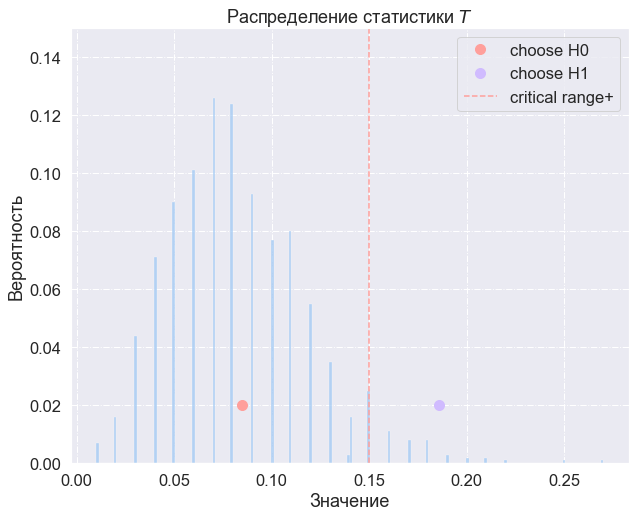

In [120]:
set_plot_style('Распределение статистики $T$', 'Значение', 'Вероятность')
np.random.seed(100500)
x = multinomial.rvs(50, p=[0.15, 0.2, 0.3, 0.35], size=1000)
y = [test_statisctic(xx) for xx in x]
threshold = np.percentile(a=y, q=95)
sns.histplot(y, bins=200, stat="probability")
ytop = 0.15
plt.ylim((0, 0.15))
plt.vlines(x=threshold, ymin=0, ymax=ytop, color='r', linestyles='dashed', label='critical range+')
plt.plot(test_statisctic([30, 40, 60, 100]), 0.02, '.', markersize=20, \
    color='C3', label=f'choose H{test(50, 0.05, [30, 40, 60, 100])}')
plt.plot(test_statisctic([30, 40, 60, 150]), 0.02, '.', markersize=20, \
    color='C4', label=f'choose H{test(50, 0.05, [30, 40, 60, 150])}')
plt.legend()
plt.show()